In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.calibration import calibration_curve
from sklearn.linear_model import SGDClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mile Stone 2/Dataset/MDS/final_df_renamed.csv')

In [ ]:
#Decreasing amount of columns

df['3.3 Rigidity_Total'] = df[['3.3a Rigidity - Neck', '3.3b Rigidity - RUE',
                           '3.3c Rigidity - LUE', '3.3d Rigidity - RLE',
                           '3.3e Rigidity - LLE']].sum(axis=1)

df['3.4 Finger_Tapping_Total'] = df[['3.4a Finger Tapping Right Hand',
                                 '3.4b Finger Tapping Left Hand']].sum(axis=1)

df['3.5 Hand_Movements_Total'] = df[['3.5a Hand movements - Right Hand',
                                 '3.5b Hand movements - Left Hand']].sum(axis=1)

df['3.6 Pronation_Supination_Total'] = df[['3.6a Pronation-Supination - Right Hand',
                                       '3.6b Pronation-Supination - Left Hand']].sum(axis=1)

df['3.7 Toe_Tapping_Total'] = df[['3.7a Toe tapping - Right foot',
                              '3.7b Toe tapping - Left foot']].sum(axis=1)

df['3.8 Leg_Agility_Total'] = df[['3.8a Leg agility - Right leg',
                              '3.8b Leg agility - Left leg']].sum(axis=1)

df['3.15 Postural_Tremor_Total'] = df[['3.15a Postural tremor - Right Hand',
                                  '3.15b Postural tremor - Left hand']].sum(axis=1)

df['3.16 Kinetic_Tremor_Total'] = df[['3.16a Kinetic tremor - Right hand',
                                 '3.16b Kinetic tremor - Left hand']].sum(axis=1)

df['3.17 Rest_Tremor_Amplitude_Total'] = df[['3.17a Rest tremor amplitude - RUE',
                                        '3.17b Rest tremor amplitude - LUE',
                                        '3.17c Rest tremor amplitude - RLE',
                                        '3.17d Rest tremor amplitude - LLE',
                                        '3.17e Rest tremor amplitude - Lip/jaw']].sum(axis=1)

In [ ]:
cm = pd.crosstab(
    df['Decoded Value for COHORT'],
    df['Sex of participant at birth'],
    rownames=['Status'],
    colnames=['Gender: 0 = Female, 1 = Male'],
    margins = True
)
cm

"Gender: 0 = Female, 1 = Male",0,1,All
Status,,,
Healthy Control,312,475,787
Parkinson's Disease,1185,1958,3143
Prodromal,1452,1398,2850
SWEDD,60,102,162
All,3009,3933,6942


In [ ]:
men_with = 1958/3933*100
print('%s: %.2f%%' %("Percent of Men with PD: ", round(men_with,2)))
print('%s: %.2f%%' %("Percent of Men without PD: ", round(100-men_with,2)))

women_with = 1185/3009*100
print('%s: %.2f%%' % ("Percent of Women with PD: ", round(women_with,2)))
print('%s: %.2f%%' % ("Percent of Women without PD: ", round(100-women_with,2)))

Percent of men with PD: : 49.78%
Percent of men without PD: : 50.22%


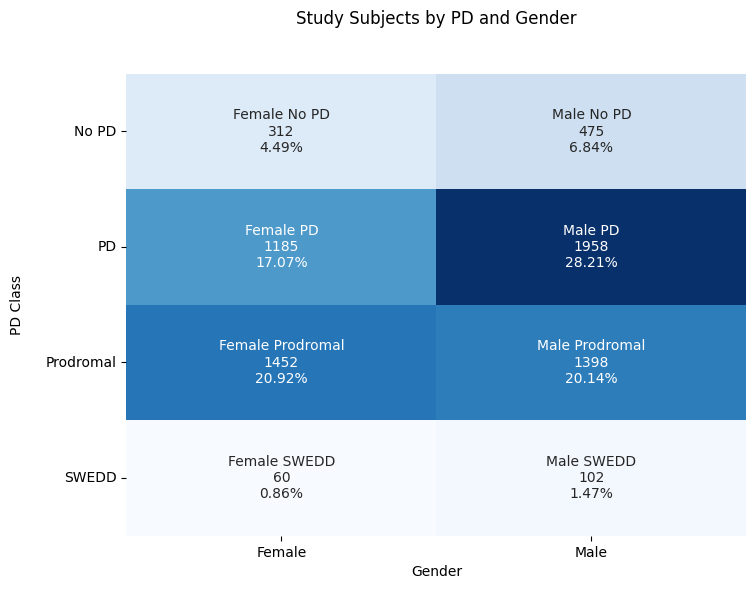

In [ ]:
# Create crosstab to summarize the data
cls_gen = pd.crosstab(df['Decoded Value for COHORT'], df['Sex of participant at birth'])

# Flatten the matrix to create annotations
group_names = ['Female No PD', 'Male No PD', 'Female PD', 'Male PD', 'Female Prodromal', 'Male Prodromal', 'Female SWEDD', 'Male SWEDD']
group_counts = ["{0:0.0f}".format(value) for value in cls_gen.to_numpy().flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cls_gen.to_numpy().flatten() / np.sum(cls_gen.to_numpy())]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Adjust the labels to fit the shape (4, 2) or the shape of your actual `cls_gen`
labels = np.asarray(labels).reshape(cls_gen.shape)

# Create Heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cls_gen, annot=labels, fmt='', cmap='Blues', cbar=False)

# Set titles and labels
ax.set_title('Study Subjects by PD and Gender\n\n')
ax.set_xlabel('Gender')
ax.set_ylabel('PD Class\n')

# Set custom tick labels for x (Gender) and y (PD Class)
ax.xaxis.set_ticklabels(['Female', 'Male'])
ax.yaxis.set_ticklabels(['No PD', 'PD', 'Prodromal', 'SWEDD'])

plt.show()

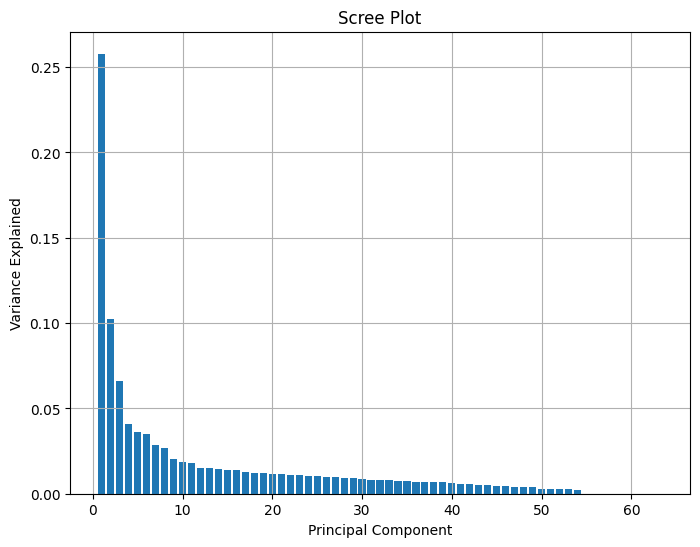

Cumulative variance explained by principal components:
[0.25789537 0.36040488 0.42636273 0.46695766 0.50310701 0.53833116
 0.56666147 0.59346945 0.61362708 0.63227797 0.65017394 0.66544183
 0.68027164 0.69455606 0.70854531 0.72237713 0.73514624 0.74735307
 0.75931195 0.77108416 0.78258791 0.79380474 0.80463272 0.8150658
 0.82518942 0.83527547 0.8448808  0.85430837 0.86329254 0.87168134
 0.87986406 0.88790925 0.895805   0.90343325 0.91069857 0.91771201
 0.92469198 0.93153505 0.93814574 0.94435105 0.95028899 0.95592897
 0.96126957 0.96628992 0.97100059 0.97539008 0.97942512 0.9833293
 0.98711275 0.99000201 0.99268797 0.99535672 0.9979247  1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


In [ ]:
data_clean = df.drop(columns=['Participant ID', 'Record ID', 'Visit ID']).dropna()

# Step 3: Filter the dataset to include relevant target classes (Healthy Control, Parkinson's Disease, Prodromal)
filtered_data = data_clean[data_clean['Decoded Value for COHORT'].isin(['Healthy Control', "Parkinson's Disease", "Prodromal"])]

# Step 4: Define the feature matrix and target variable
X_filtered = filtered_data.drop(columns=['Decoded Value for COHORT'])  # Features (adjust based on your actual dataset)
y_filtered = filtered_data['Decoded Value for COHORT']  # Target (COHORT)

# Step 5: Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# Step 6: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 7: Calculate the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Step 8: Creaplt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()
# Optional: Print the cumulative variance explained to determine the number of components to retain
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance explained by principal components:")
print(cumulative_variance)

Unsupervise ML

# Different Approach

(6780, 23)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HANDWRITING                              0.099688
ORAL FUNCTION                            0.091184
DRESSING                                 0.080893
DOING HOBBIES AND OTHER ACTIVITIES       0.052683
HYGIENE                                  0.049305
GASTRIC FUNCTION                         0.041023
RIGIDITY                                 0.023810
ENERGY LEVEL                             0.020474
3.17b Rest tremor amplitude - LUE        0.015497
MOBILITY                                 0.014572
SLEEP QUALITY                            0.014311
Sex of participant at birth              0.009924
PAIN AND OTHER SENSATIONS                0.009604
FINGER                                   0.008879
3.17d Rest tremor amplitude - LLE        0.006326
3.17e Rest tremor amplitude - Lip/jaw    0.005361
3.17a Rest tremor amplitude - RUE        0.005149
3.18 Constancy of rest tremor            0.000000
3.17c Rest tremor amplitude - RLE        0.000000
dtype: float64


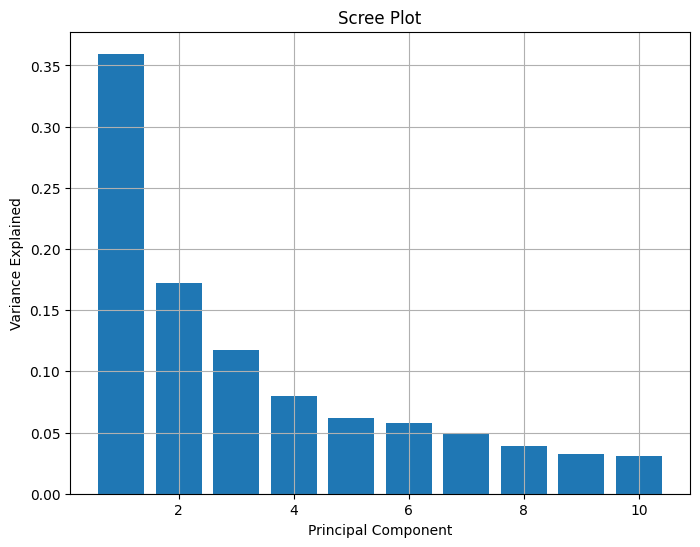

Cumulative variance explained by principal components:
[0.35959322 0.53203663 0.64933959 0.72933253 0.79128388 0.8487293
 0.89810298 0.93685905 0.96915618 1.        ]
Accuracy of KNN: 0.54


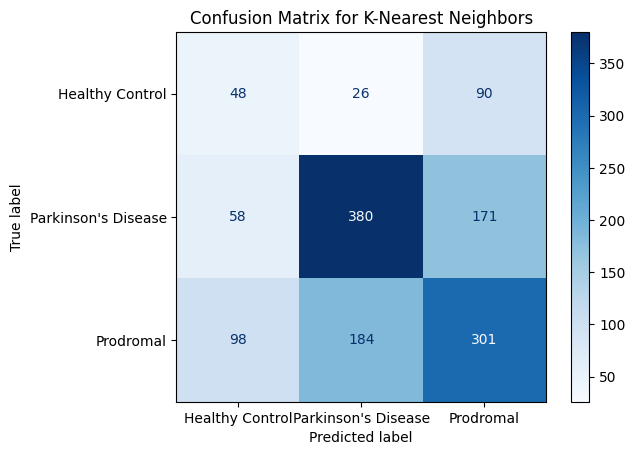

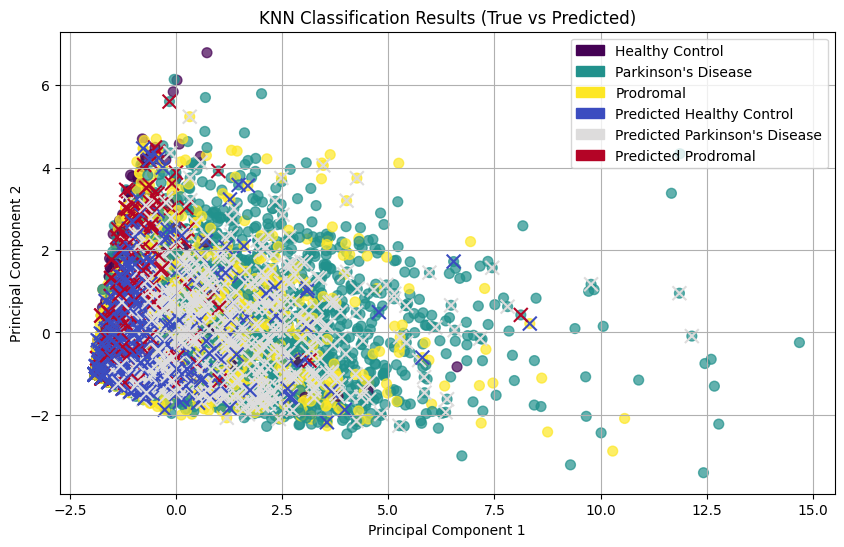

In [ ]:
#Using suggested strategy and feature engineering
import pandas as pd
#find average after grouping survey questions and create new dataframe with new mean columns + existing columns

df = pd.read_csv('/content/drive/MyDrive/Mile Stone 2/Dataset/MDS/final_df_renamed.csv')
#df['SLEEP QUALITY'] = df[['SLEEP PROBLEMS (NIGHT)','DAYTIME SLEEPINESS','TURNING IN BED']].mean()
#sleep quality: SLEEP PROBLEMS (NIGHT)','DAYTIME SLEEPINESS','TURNING IN BED'
df['SLEEP QUALITY'] = df[['SLEEP PROBLEMS (NIGHT)', 'DAYTIME SLEEPINESS', 'TURNING IN BED']].mean(axis=1, skipna=True)
df = df.drop(['SLEEP PROBLEMS (NIGHT)', 'DAYTIME SLEEPINESS', 'TURNING IN BED'], axis=1)

#energy level:'LIGHTHEADEDNESS ON STANDING', 'FATIGUE'
df['ENERGY LEVEL'] = df[['LIGHTHEADEDNESS ON STANDING', 'FATIGUE']].mean(axis=1, skipna=True)
df = df.drop(['LIGHTHEADEDNESS ON STANDING', 'FATIGUE'], axis=1)

#gastric function:'URINARY PROBLEMS','CONSTIPATION PROBLEMS'
df['GASTRIC FUNCTION'] = df[['URINARY PROBLEMS','CONSTIPATION PROBLEMS']].mean(axis=1, skipna=True)
df = df.drop(['URINARY PROBLEMS','CONSTIPATION PROBLEMS'], axis=1)

#oral muscle function:'SPEECH', 'SALIVA + DROOLING', 'CHEWING AND SWALLOWING', 'EATING TASKS'
df['ORAL FUNCTION'] = df[['SPEECH', 'SALIVA + DROOLING', 'CHEWING AND SWALLOWING', 'EATING TASKS']].mean(axis=1, skipna=True)
df = df.drop(['SPEECH', 'SALIVA + DROOLING', 'CHEWING AND SWALLOWING', 'EATING TASKS'], axis=1)

#tremor: 'TREMOR','3.15a Postural tremor - Right Hand', '3.15b Postural tremor - Left hand', '3.16a Kinetic tremor - Right hand', '3.16b Kinetic tremor - Left hand'
df['TREMOR'] = df[['TREMOR','3.15a Postural tremor - Right Hand', '3.15b Postural tremor - Left hand', '3.16a Kinetic tremor - Right hand', '3.16b Kinetic tremor - Left hand']].mean(axis=1, skipna=True)
df = df.drop(['TREMOR','3.15a Postural tremor - Right Hand', '3.15b Postural tremor - Left hand', '3.16a Kinetic tremor - Right hand', '3.16b Kinetic tremor - Left hand'], axis=1)

#overall mobility: 'GETTING OUT OF BED, CAR, OR DEEP CHAIR', 'WALKING AND BALANCE', 'FREEZING', '3.1 Speech', '3.2 Facial expression','3.12 Postural stability', '3.13 Posture', '3.14 Global spontaneity of movement'
df['MOBILITY'] = df[['GETTING OUT OF BED, CAR, OR DEEP CHAIR', 'WALKING AND BALANCE', 'FREEZING', '3.1 Speech', '3.2 Facial expression','3.12 Postural stability', '3.13 Posture', '3.14 Global spontaneity of movement']].mean(axis=1, skipna=True)
df = df.drop(['GETTING OUT OF BED, CAR, OR DEEP CHAIR', 'WALKING AND BALANCE', 'FREEZING', '3.1 Speech', '3.2 Facial expression','3.12 Postural stability', '3.13 Posture', '3.14 Global spontaneity of movement'], axis=1)

#rigidity: '3.3a Rigidity - Neck', '3.3b Rigidity - RUE', '3.3c Rigidity - LUE', '3.3d Rigidity - RLE', '3.3e Rigidity - LLE'
df['RIGIDITY'] = df[['3.3a Rigidity - Neck', '3.3b Rigidity - RUE', '3.3c Rigidity - LUE', '3.3d Rigidity - RLE', '3.3e Rigidity - LLE']].mean(axis=1, skipna=True)
df = df.drop(['3.3a Rigidity - Neck', '3.3b Rigidity - RUE', '3.3c Rigidity - LUE', '3.3d Rigidity - RLE', '3.3e Rigidity - LLE'], axis=1)

#finger mobility: '3.4a Finger Tapping Right Hand', '3.4b Finger Tapping Left Hand'
df['FINGER'] = df[['3.4a Finger Tapping Right Hand', '3.4b Finger Tapping Left Hand']].mean(axis=1, skipna=True)
df = df.drop(['3.4a Finger Tapping Right Hand', '3.4b Finger Tapping Left Hand'], axis=1)

#hand movements: '3.5a Hand movements - Right Hand', '3.5b Hand movements - Left Hand','3.6a Pronation-Supination - Right Hand', '3.6b Pronation-Supination - Left Hand'
df['FINGER'] = df[['3.5a Hand movements - Right Hand', '3.5b Hand movements - Left Hand','3.6a Pronation-Supination - Right Hand', '3.6b Pronation-Supination - Left Hand']].mean(axis=1, skipna=True)
df = df.drop(['3.5a Hand movements - Right Hand', '3.5b Hand movements - Left Hand','3.6a Pronation-Supination - Right Hand', '3.6b Pronation-Supination - Left Hand'], axis=1)

#feet/leg movements: '3.7a Toe tapping - Right foot', '3.7b Toe tapping - Left foot', '3.8a Leg agility - Right leg', '3.8b Leg agility - Left leg', '3.9 Arising from chair', '3.10 Gait', '3.11 Freezing of gait'
df['FINGER'] = df[['3.7a Toe tapping - Right foot', '3.7b Toe tapping - Left foot', '3.8a Leg agility - Right leg', '3.8b Leg agility - Left leg', '3.9 Arising from chair', '3.10 Gait', '3.11 Freezing of gait']].mean(axis=1, skipna=True)
df = df.drop(['3.7a Toe tapping - Right foot', '3.7b Toe tapping - Left foot', '3.8a Leg agility - Right leg', '3.8b Leg agility - Left leg', '3.9 Arising from chair', '3.10 Gait', '3.11 Freezing of gait'], axis=1)

df = df[df['Decoded Value for COHORT']!= 'SWEDD']

print(df.shape)

df = df.drop(['Participant ID', 'Record ID', 'Visit ID'], axis = 1)

#feature engineering using mutual information (see which feature are more dependent on target variable)
from sklearn.feature_selection import mutual_info_classif
#target value
df['Decoded Value for COHORT'].unique()

y = df[['Decoded Value for COHORT']]
X = df.drop(['Decoded Value for COHORT'], axis=1)

# Compute mutual information
mi_scores = mutual_info_classif(X, y)

# Get feature importance as a pandas Series
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

# Display feature importance
print(mi_scores)

#get top 10 most important features
feature_names = mi_scores.index.tolist()
feature_names = feature_names[:10]
feature_names


#split into X and y
train_X = df[feature_names]
train_X

train_y = df['Decoded Value for COHORT']
train_y

#PCA visualization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 7: Calculate the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Step 8: Creaplt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()
# Optional: Print the cumulative variance explained to determine the number of components to retain
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance explained by principal components:")
print(cumulative_variance)

#supervised learning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, train_y, test_size=0.2, random_state=42)

# Step 8: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust 'k' (n_neighbors) as needed
knn.fit(X_train, y_train)

# Step 9: Predict on the test set
y_pred = knn.predict(X_test)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()


#KNN model evaluation clustering
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))

# Plot the true classes (color-coded by class)
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(train_y)[0], cmap='viridis', s=50, alpha=0.7, label='True Labels')

# Plot the predicted classes (for test data only, using cross markers)
scatter2 = plt.scatter(X_test[:, 0], X_test[:, 1], c=pd.factorize(y_pred)[0], marker='x', cmap='coolwarm', s=100, label='Predicted Labels')

# Add color bar for the true labels (mapped to Healthy Control, Parkinson's Disease, Prodromal)
handles_true = [
    mpatches.Patch(color=scatter1.cmap(scatter1.norm(0)), label='Healthy Control'),
    mpatches.Patch(color=scatter1.cmap(scatter1.norm(1)), label='Parkinson\'s Disease'),
    mpatches.Patch(color=scatter1.cmap(scatter1.norm(2)), label='Prodromal')
]

# Add legend for the predicted labels
handles_pred = [
    mpatches.Patch(color=scatter2.cmap(scatter2.norm(0)), label='Predicted Healthy Control', hatch='x'),
    mpatches.Patch(color=scatter2.cmap(scatter2.norm(1)), label='Predicted Parkinson\'s Disease', hatch='x'),
    mpatches.Patch(color=scatter2.cmap(scatter2.norm(2)), label='Predicted Prodromal', hatch='x')
]

# Create combined legend
plt.legend(handles=handles_true + handles_pred, loc='upper right')

plt.title('KNN Classification Results (True vs Predicted)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Cluster  True Label         
0        Parkinson's Disease     824
         Prodromal               220
         Healthy Control           8
1        Prodromal              1486
         Parkinson's Disease    1045
         Healthy Control         379
2        Parkinson's Disease     665
         Prodromal               561
         Healthy Control         236
Name: count, dtype: int64


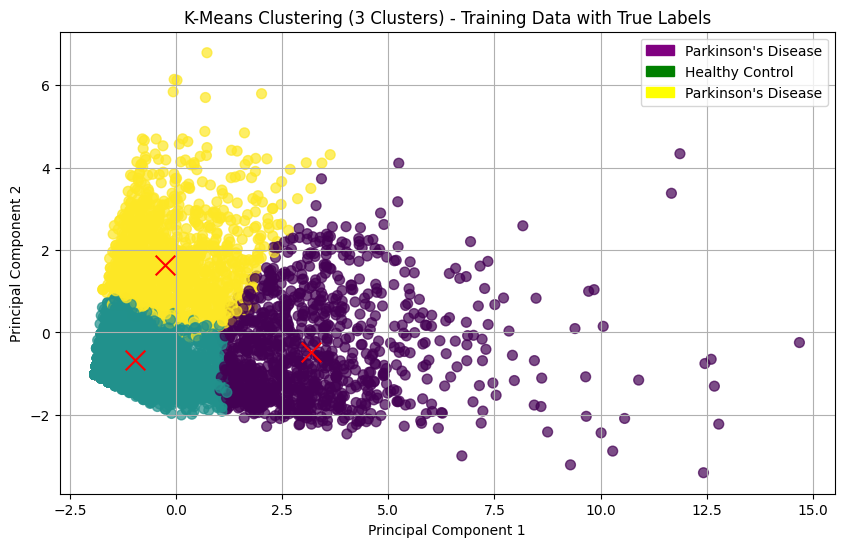

In [ ]:
from sklearn.cluster import KMeans, DBSCAN


X_train, X_test, y_train, y_test = train_test_split(X_pca, train_y, test_size=0.2, random_state=42)

# Step 8: Train K-Means Clustering on the training set (with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Step 9: Predict cluster labels for the training set
train_labels = kmeans.predict(X_train)

# Step 10: Create a DataFrame to store cluster labels and true labels for the training set
df_clusters = pd.DataFrame({'Cluster': train_labels, 'True Label': y_train})
# Step 11: Use value_counts to find the most common true label for each cluster
cluster_mapping = df_clusters.groupby('Cluster')['True Label'].apply(lambda x: x.value_counts().idxmax())
print(df_clusters.groupby('Cluster')['True Label'].value_counts())
# Step 12: Create a dictionary to map cluster numbers to their true labels for visualization
cluster_to_label = {0: cluster_mapping[0], 1: cluster_mapping[1], 2: cluster_mapping[2]}

# Step 13: Create a new array with the true labels mapped for visualization
mapped_labels = np.array([cluster_to_label[cluster] for cluster in train_labels])

# Step 14: Visualize the K-Means clusters for the training set with correct labels
plt.figure(figsize=(10, 6))

# Scatter plot for the training data clusters with mapped true labels
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap='viridis', s=50, alpha=0.7)

# Mark the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label='Centroids')

# Create custom legend based on the true label mapping
cluster_0 = mpatches.Patch(color='purple', label=cluster_mapping[0])  # Cluster 0
cluster_1 = mpatches.Patch(color='green', label='Healthy Control')   # Cluster 1
cluster_2 = mpatches.Patch(color='yellow', label=cluster_mapping[2])  # Cluster 2

plt.legend(handles=[cluster_0, cluster_1, cluster_2], loc='upper right')

# Plot title and labels
plt.title('K-Means Clustering (3 Clusters) - Training Data with True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Predictive model

---



**DecisionTree**

In [ ]:
df_sum =pd.read_csv('/content/drive/MyDrive/Mile Stone 2/Dataset/MDS/sum_df.csv')

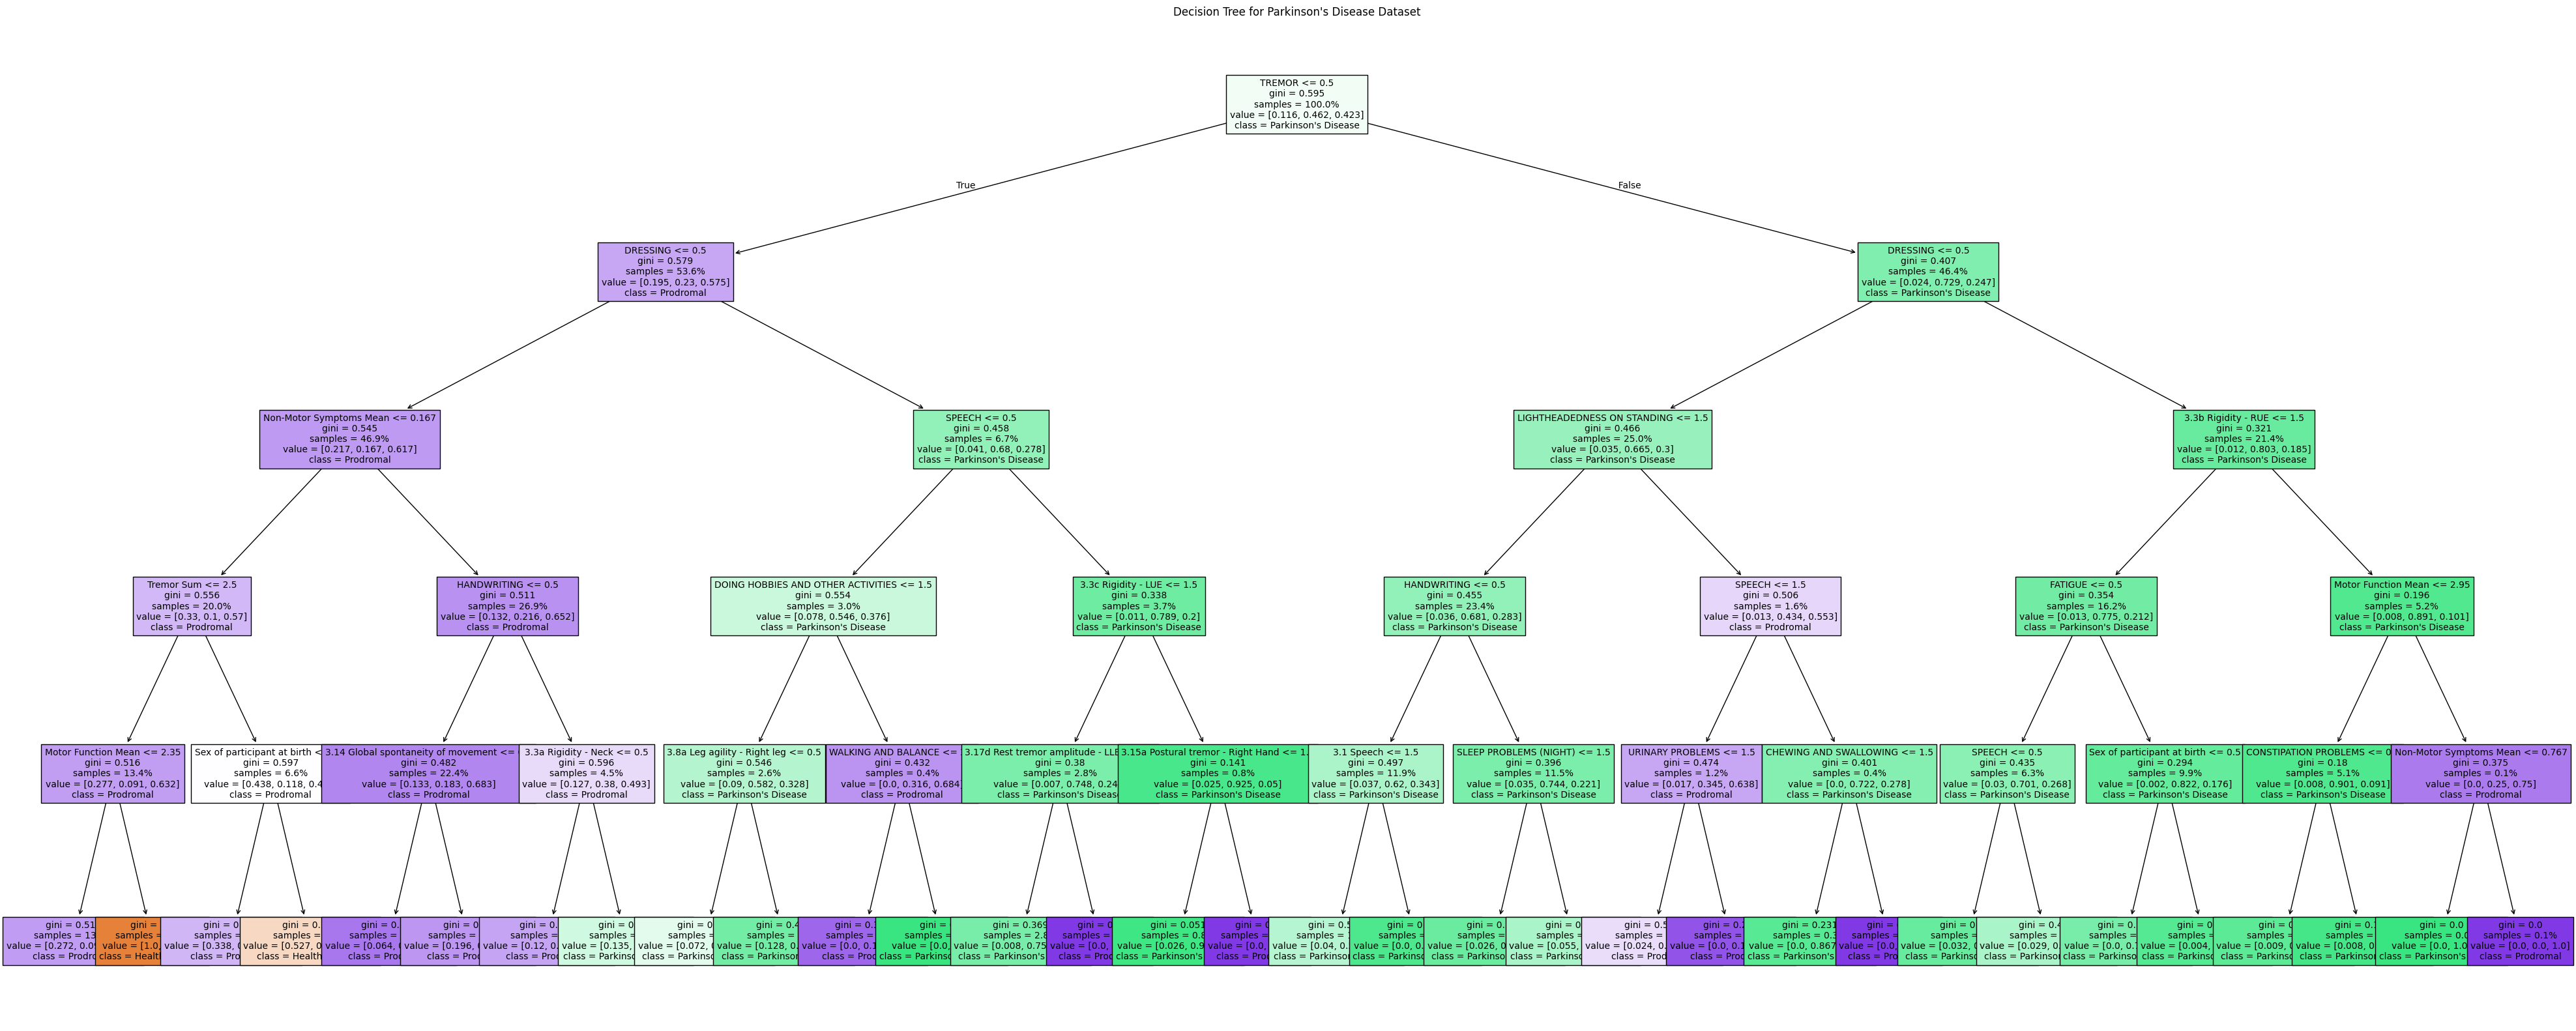

In [ ]:
# Check if the columns exist before dropping them and handle missing values
columns_to_drop = ["Participant ID", "Visit ID", "Record ID"]

# Drop the columns if they exist, and drop any rows with missing values
df_sum = df_sum.drop(columns=[col for col in columns_to_drop if col in df_sum.columns]).dropna()
# Separate features (X) and target (y)
X_filtered = df_sum.drop(columns=["Decoded Value for COHORT"])
y_filtered = df_sum["Decoded Value for COHORT"]
label_encoder = LabelEncoder()
# Re-encode the target variable
y_filtered_encoded = label_encoder.fit_transform(y_filtered)

# Split the filtered data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered_encoded, test_size=0.2, random_state=42
)

# Train the decision tree model with the filtered data
decision_tree_adjusted_sum = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree_adjusted_sum.fit(X_train_filtered, y_train_filtered)


# Adjusting the decision tree visualization to improve readability by reducing font size and controlling layout
plt.figure(figsize=(50, 20))
tree.plot_tree(
    decision_tree_adjusted_sum,
    feature_names=X_filtered.columns,
    class_names=label_encoder.classes_,
    filled=True,
    fontsize=10,  # Smaller font size for readability
    proportion=True,  # Scale boxes based on samples in each node
)
plt.title("Decision Tree for Parkinson's Disease Dataset")
plt.show()

In [ ]:

# Make predictions on the test set
y_pred_filtered = decision_tree_adjusted_sum.predict(X_test_filtered)

# Calculate accuracy, F1 score, and recall
accuracy = accuracy_score(y_test_filtered, y_pred_filtered)
f1 = f1_score(y_test_filtered, y_pred_filtered, average='weighted')
recall = recall_score(y_test_filtered, y_pred_filtered, average='weighted')

# Print the results
print(f'Accuracy: {accuracy}')
print(f'F1 Score (weighted): {f1}')
print(f'Recall (weighted): {recall}')

Accuracy: 0.6701081612586037
F1 Score (weighted): 0.6528283527528771
Recall (weighted): 0.6701081612586037


## Logistic Regression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Mile Stone 2/Dataset/MDS/sum_df.csv')
# Proper selection of multiple columns
df = df[['Participant ID', 'Record ID', 'Visit ID', 'Sex of participant at birth',
         'Decoded Value for COHORT', 'Rigidity Mean', 'Tremor Mean',
         'Motor Function Mean', 'Posture and Gait Mean',
         'Non-Motor Symptoms Mean', 'Rigidity Sum', 'Tremor Sum',
         'Motor Function Sum', 'Posture and Gait Sum', 'Non-Motor Symptoms Sum']]
df

,Participant ID,Record ID,Visit ID,Sex of participant at birth,Decoded Value for COHORT,Rigidity Mean,Tremor Mean,Motor Function Mean,Posture and Gait Mean,Non-Motor Symptoms Mean,Rigidity Sum,Tremor Sum,Motor Function Sum,Posture and Gait Sum,Non-Motor Symptoms Sum
0,3000.0,272451501,BL,0,Healthy Control,0.0,0.000000,0.3,0.2,0.133333,0.0,0.0,3.0,1.0,2.0
1,3000.0,338702301,V04,0,Healthy Control,0.0,0.000000,0.0,0.2,0.266667,0.0,0.0,0.0,1.0,4.0
2,3000.0,385009201,V06,0,Healthy Control,0.0,0.000000,0.3,0.2,0.066667,0.0,0.0,3.0,1.0,1.0
3,3000.0,512466901,V10,0,Healthy Control,0.0,0.444444,1.4,0.2,0.333333,0.0,4.0,14.0,1.0,5.0
4,3001.0,278741601,BL,1,Parkinson's Disease,0.0,0.000000,0.2,0.2,0.533333,0.0,0.0,2.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,363157.0,IA543221,BL,1,Prodromal,0.2,0.111111,1.4,0.6,0.466667,1.0,1.0,14.0,3.0,7.0
6776,366799.0,IA553764,BL,1,Prodromal,1.6,1.444444,2.5,1.4,0.000000,8.0,13.0,25.0,7.0,0.0
6777,366908.0,IA569760,BL,1,Prodromal,0.4,0.000000,0.0,0.0,0.133333,2.0,0.0,0.0,0.0,2.0
6778,373975.0,IA557325,BL,1,Prodromal,0.0,0.111111,0.0,0.0,0.466667,0.0,1.0,0.0,0.0,7.0


In [ ]:
# Split the data in to 80/20 train test set
X = df.drop(columns=['Decoded Value for COHORT','Visit ID','Record ID'])
y = df['Decoded Value for COHORT']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,stratify=y)
y_train = y_train.replace({'Healthy Control': 0, 'Parkinson\'s Disease': 1, 'Prodromal': 0})
y_test = y_test.replace({'Healthy Control': 0, 'Parkinson\'s Disease': 1, 'Prodromal': 0})
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 5424
Test set size: 1356


<ipython-input-17-740c302302eb>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Healthy Control': 0, 'Parkinson\'s Disease': 1, 'Prodromal': 0})
<ipython-input-17-740c302302eb>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Healthy Control': 0, 'Parkinson\'s Disease': 1, 'Prodromal': 0})


In [ ]:
# Identify continuous columns
continuous_cols = X_train.select_dtypes(include=['float64','int64']).columns
# Create preprocessor for continuous columns
preprocessor = ColumnTransformer(
    transformers = [
        ('num',Pipeline(steps =[
            ('imputer',SimpleImputer(strategy='mean')),
            ('scaler',StandardScaler())
        ]),continuous_cols)
    ],remainder = 'passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Participant ID', 'Sex of participant at birth', 'Rigidity Mean',
       'Tremor Mean', 'Motor Function Mean', 'Posture and Gait Mean',
       'Non-Motor Symptoms Mean', 'Rigidity Sum', 'Tremor Sum',
       'Motor Function Sum', 'Posture and Gait Sum', 'Non-Motor Symptoms Sum'],
      dtype='object'))])

In [ ]:
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])
# Perform cross-validation to compare AUC
log_reg_auc = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc').mean()
log_reg_auc

0.7554893391257718

Logistic Regression AUC: 0.771


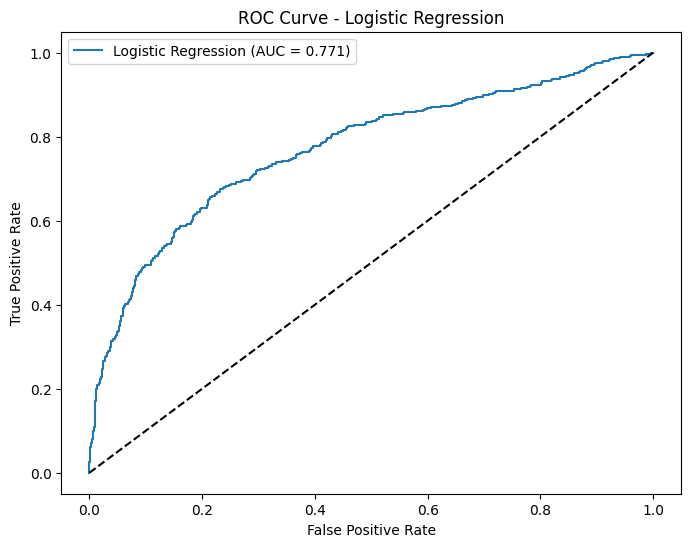

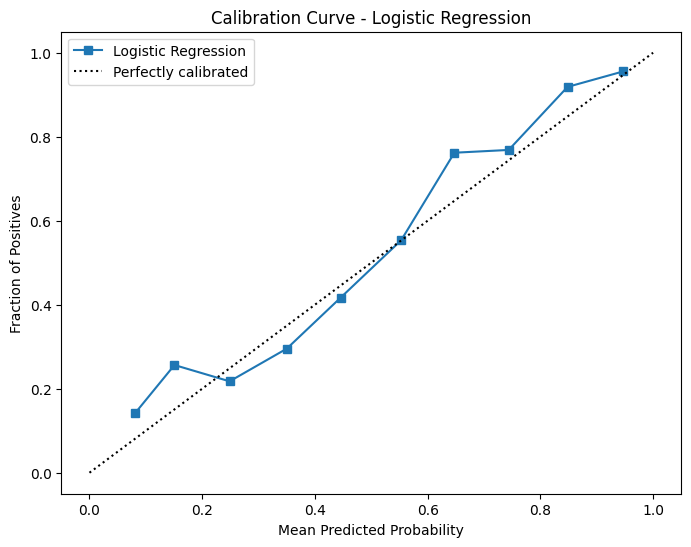

In [ ]:
#Perform cross-validation and store AUC for Logistic Regression
log_reg.fit(X_train, y_train)  # Train the Logistic Regression model
y_pred_probs_log = log_reg.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC and calibration

# Calculate AUC for Logistic Regression
log_reg_auc = roc_auc_score(y_test, y_pred_probs_log)
print(f"Logistic Regression AUC: {log_reg_auc:.3f}")

# Plot ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_probs_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {log_reg_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Plot Calibration Curve for Logistic Regression
fraction_of_positives_log, mean_predicted_value_log = calibration_curve(y_test, y_pred_probs_log, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value_log, fraction_of_positives_log, "s-", label="Logistic Regression")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.title("Calibration Curve - Logistic Regression")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.show()

## Random Forest

In [ ]:
rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
# Perform cross-validation to compare AUC
rf_auc = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='roc_auc').mean()
rf_auc

0.8007748739011286

Random Forest AUC: 0.815


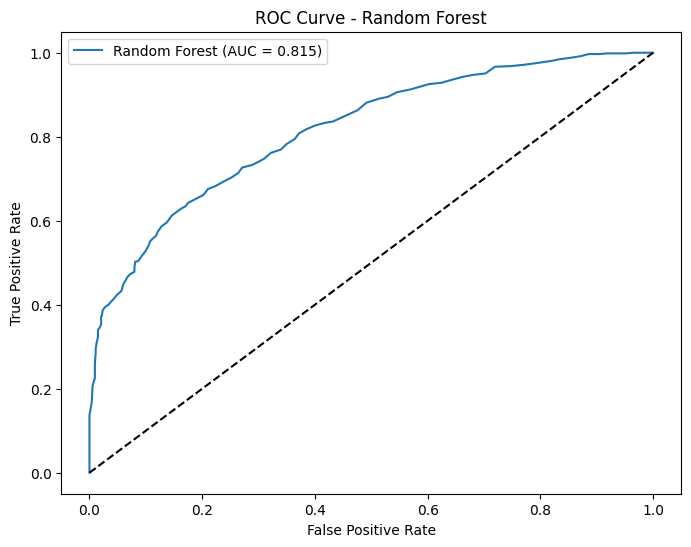

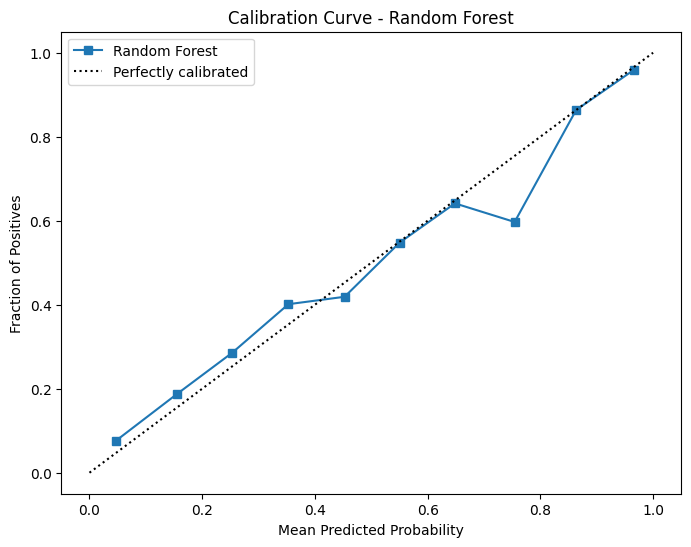

In [ ]:
# Perform cross-validation and store AUC for Random Forest
rf_clf.fit(X_train, y_train)  # Train the Random Forest model
y_pred_probs_rf = rf_clf.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC and calibration

# Calculate AUC for Random Forest
rf_auc = roc_auc_score(y_test, y_pred_probs_rf)
print(f"Random Forest AUC: {rf_auc:.3f}")

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Plot Calibration Curve for Random Forest
fraction_of_positives_rf, mean_predicted_value_rf = calibration_curve(y_test, y_pred_probs_rf, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value_rf, fraction_of_positives_rf, "s-", label="Random Forest")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.title("Calibration Curve - Random Forest")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.show()

In [ ]:
best_model = log_reg if log_reg_auc > rf_auc else rf_clf
# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate and report AUC on the test set
test_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Test AUC: {test_auc}")

Test AUC: 0.8154337685853181


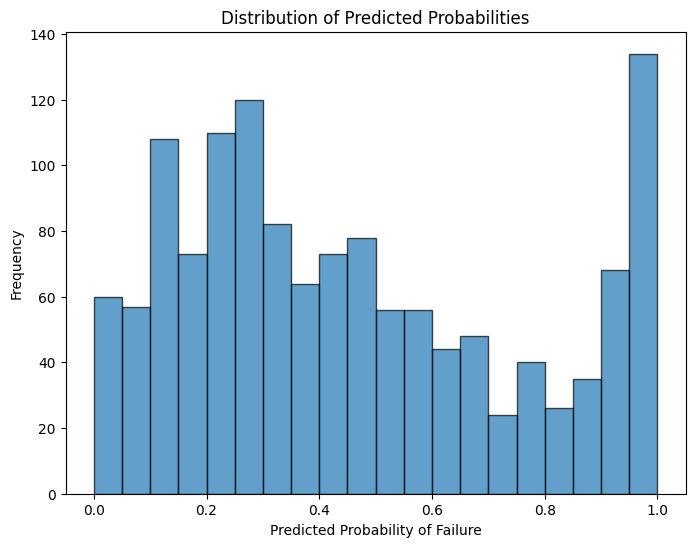

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Probability of Failure')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

## Identify predicted probability threshold to identify the top 20% highest risk patients

In [ ]:
threshold = np.percentile(y_pred_prob, 80)
print(f"Probability threshold for top 20% highest risk patients: {threshold}")

# Identify students in the top 20% of risk based on this threshold
high_risk_patients = X_test[y_pred_prob >= threshold]
print(f"Number of high-risk patients: {len(high_risk_patients)}")

Probability threshold for top 20% highest risk patients: 0.78
Number of high-risk patients: 275


## Visualization
ROC Curve:
Show how well the model distinguishes between high-risk and low-risk patients for conversion to Parkinson’s.

Calibration Curve:
Demonstrate how reliable the model’s predicted probabilities are for actual patient outcomes.

Distribution of Probabilities:
Use a histogram to show the range of predicted risk probabilities among patients, illustrating the threshold that marks the top 20%.

 ## Key Finding
Highlight the most important findings:

Probability Threshold: The model determined that patients with a predicted risk probability of 0.78 or higher are in the top 20% of those at highest risk for developing Parkinson's disease.

High-Risk Group: Out of the patients in the test set, 275 patients were identified as being in this high-risk category, meaning they are most likely to convert to Parkinson’s disease based on their current symptoms.

## Implication
By focusing on the top 20% of at-risk patients, healthcare providers can prioritize these individuals for more frequent monitoring, early interventions, or tailored treatment plans. Identifying high-risk patients early can help slow disease progression or improve patient outcomes.


## Time Series analysis

In [ ]:
visit_mapping = {
    'BL': 1,
    'V02': 2,
    'V04': 4,
    'V06': 6,
    'V08': 8,
    'V10': 10
}

# Apply this mapping to the "Visit ID" column
df['Visit Number'] = df['Visit ID'].map(visit_mapping)

# Sorting data by Participant ID and Visit Number to ensure correct time sequence
df = df.sort_values(by=['Participant ID', 'Visit Number'])

In [ ]:
df

,Participant ID,Record ID,Visit ID,Sex of participant at birth,Decoded Value for COHORT,Rigidity Mean,Tremor Mean,Motor Function Mean,Posture and Gait Mean,Non-Motor Symptoms Mean,Rigidity Sum,Tremor Sum,Motor Function Sum,Posture and Gait Sum,Non-Motor Symptoms Sum,Visit Number
0,3000.0,272451501,BL,0,Healthy Control,0.0,0.000000,0.3,0.2,0.133333,0.0,0.0,3.0,1.0,2.0,1
1,3000.0,338702301,V04,0,Healthy Control,0.0,0.000000,0.0,0.2,0.266667,0.0,0.0,0.0,1.0,4.0,4
2,3000.0,385009201,V06,0,Healthy Control,0.0,0.000000,0.3,0.2,0.066667,0.0,0.0,3.0,1.0,1.0,6
3,3000.0,512466901,V10,0,Healthy Control,0.0,0.444444,1.4,0.2,0.333333,0.0,4.0,14.0,1.0,5.0,10
4,3001.0,278741601,BL,1,Parkinson's Disease,0.0,0.000000,0.2,0.2,0.533333,0.0,0.0,2.0,1.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,363157.0,IA543221,BL,1,Prodromal,0.2,0.111111,1.4,0.6,0.466667,1.0,1.0,14.0,3.0,7.0,1
6776,366799.0,IA553764,BL,1,Prodromal,1.6,1.444444,2.5,1.4,0.000000,8.0,13.0,25.0,7.0,0.0,1
6777,366908.0,IA569760,BL,1,Prodromal,0.4,0.000000,0.0,0.0,0.133333,2.0,0.0,0.0,0.0,2.0,1
6778,373975.0,IA557325,BL,1,Prodromal,0.0,0.111111,0.0,0.0,0.466667,0.0,1.0,0.0,0.0,7.0,1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA

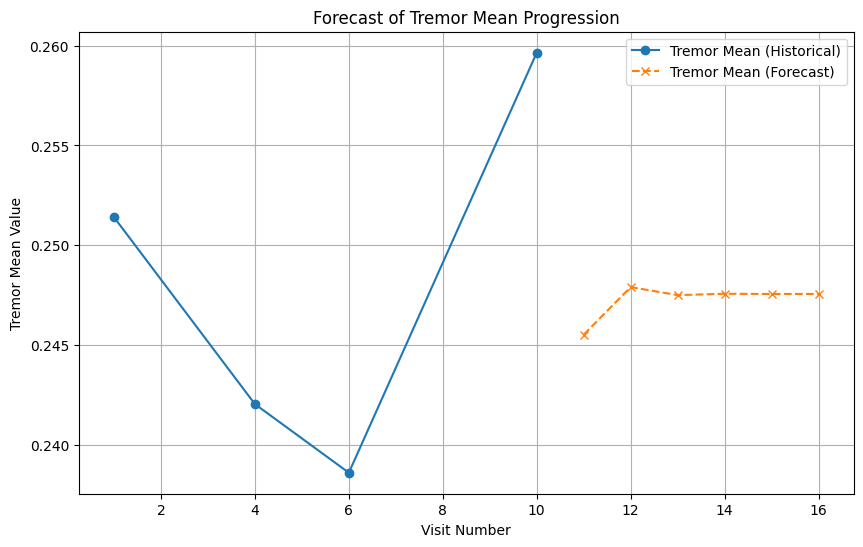

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA

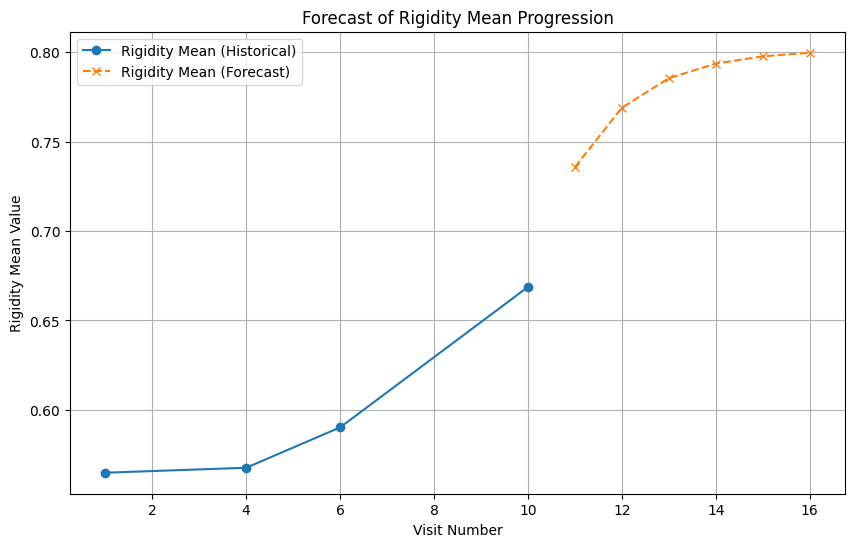

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA

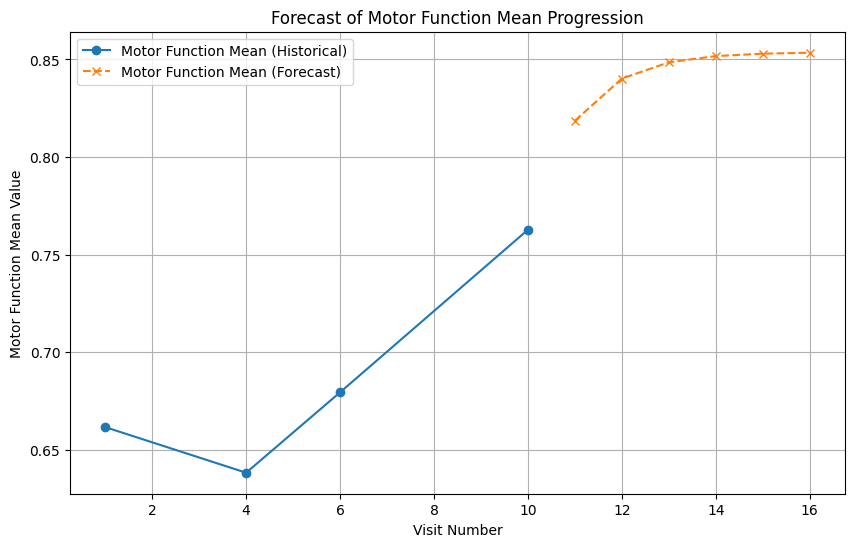

In [ ]:
# Selecting relevant columns for the analysis
symptoms_columns = ['Tremor Mean', 'Rigidity Mean', 'Motor Function Mean',
                    'Posture and Gait Mean', 'Non-Motor Symptoms Mean']

# Grouping the data by Visit Number to calculate the mean of symptoms across visits
symptoms_progression = df.groupby('Visit Number')[symptoms_columns].mean()

# Function to forecast future visits using ARIMA model and plot results
def forecast_symptom(symptom_name, steps=6):
    # Selecting the symptom data and dropping null values
    symptom_data = symptoms_progression[symptom_name].dropna()

    # Define the ARIMA model (p=1, d=1, q=1) as an initial guess
    arima_model = ARIMA(symptom_data, order=(1, 1, 1))
    arima_result = arima_model.fit()

    # Forecast for the next `steps` periods (including V11 to V18)
    forecast = arima_result.forecast(steps=steps)

    # Plotting the historical data and forecasted data
    plt.figure(figsize=(10, 6))
    plt.plot(symptoms_progression.index, symptom_data, label=f'{symptom_name} (Historical)', marker='o')
    plt.plot(range(symptoms_progression.index[-1] + 1, symptoms_progression.index[-1] + 1 + steps),
             forecast, label=f'{symptom_name} (Forecast)', linestyle='--', marker='x')
    plt.title(f'Forecast of {symptom_name} Progression')
    plt.xlabel('Visit Number')
    plt.ylabel(f'{symptom_name} Value')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Apply the forecasting function to "Tremor Mean"
forecast_symptom('Tremor Mean')

# Apply the forecasting function to "Rigidity Mean"
forecast_symptom('Rigidity Mean')

# Apply the forecasting function to "Motor Function Mean"
forecast_symptom('Motor Function Mean')

## Gradient Descent and Multiple Regression

In [ ]:
# First step labeling Parkinson or not Parkinson
# Creating the 'Parkinson' column based on the "Decoded Value for COHORT"
df['Parkinson'] = df['Decoded Value for COHORT'].apply(lambda x: 1 if x == "Parkinson's Disease" else 0)

# Checking the distribution of the new Parkinson column
df['Parkinson'].value_counts()
X = df[['Rigidity Sum','Tremor Sum','Motor Function Sum','Posture and Gait Sum','Non-Motor Symptoms Sum']].dropna()
y = df['Parkinson'].dropna()

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features for better performance in gradient descent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using SGDClassifier with logistic loss function to perform gradient descent
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal', random_state=42)
sgd_classifier.fit(X_train_scaled, y_train)

# Getting the weights (coefficients) learned by the model
sgd_weights = sgd_classifier.coef_

# Displaying the resulting weights
sgd_weights, sgd_classifier.intercept_

(array([[ 0.10789418,  0.03946231, -0.1268167 , -0.06324631,  0.77659627]]),
 array([-0.08475943]))

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z.

    Parameters:
    z: A scalar or numpy array of any size.

    Returns:
    The sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))

<ipython-input-31-6ffe30f79f1f>:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


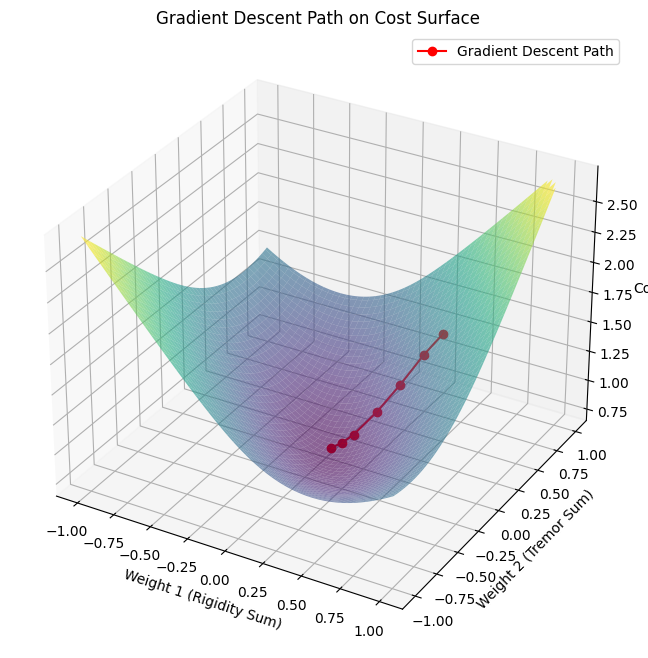

In [ ]:
def cost_function(w1, w2, X1, X2, y):
    m = len(y)
    predictions = sigmoid(w1 * X1 + w2 * X2)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Creating a mesh grid for two variables (weights w1 and w2)
w1_vals = np.linspace(-1, 1, 100)
w2_vals = np.linspace(-1, 1, 100)
w1_vals, w2_vals = np.meshgrid(w1_vals, w2_vals)

# Assume we're using "Rigidity Sum" and "Tremor Sum" for the 3D visualization
X1 = X['Rigidity Sum'].values
X2 = X['Tremor Sum'].values
y_values = y.values

# Calculate the cost for each combination of w1 and w2
Z = np.array([cost_function(w1, w2, X1, X2, y_values) for w1, w2 in zip(np.ravel(w1_vals), np.ravel(w2_vals))])
Z = Z.reshape(w1_vals.shape)

# Gradient descent path for two weights (example)
path_w1 = np.array([0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0])
path_w2 = np.array([0.5, 0.45, 0.35, 0.25, 0.15, 0.1, 0.05])
path_cost = np.array([cost_function(w1, w2, X1, X2, y_values) for w1, w2 in zip(path_w1, path_w2)])

# Plotting the 3D surface for the cost function
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1_vals, w2_vals, Z, cmap='viridis', alpha=0.6)
ax.plot(path_w1, path_w2, path_cost, color='r', marker='o', label='Gradient Descent Path')

# Labels and titles
ax.set_title('Gradient Descent Path on Cost Surface')
ax.set_xlabel('Weight 1 (Rigidity Sum)')
ax.set_ylabel('Weight 2 (Tremor Sum)')
ax.set_zlabel('Cost')
plt.legend()
plt.show()

In [ ]:
gradient_weights = np.array([ 0.10789418,  0.03946231, -0.1268167 , -0.06324631,  0.77659627])
intercept = -0.08475943  # Intercept (bias term)

# Features (X) - the same features used in gradient descent
X_features = X[['Rigidity Sum', 'Tremor Sum', 'Motor Function Sum', 'Posture and Gait Sum', 'Non-Motor Symptoms Sum']].values

# Linear regression prediction: y_pred = X * weights + intercept
y_pred = np.dot(X_features, gradient_weights) + intercept

# Since this is a logistic regression-like model, we can apply the sigmoid function to interpret the predictions as probabilities
y_pred_probabilities = sigmoid(y_pred)

# Thresholding to classify as Parkinson's (1) or not (0), based on probability >= 0.5
y_pred_class = (y_pred_probabilities >= 0.5).astype(int)

# Displaying a few predicted classes
y_pred_class[:10], y_pred_probabilities[:10]

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0.73589422, 0.95065803, 0.56171874, 0.89258204, 0.9970149 ,
        0.99918404, 0.99869375, 0.99807632, 0.99996271, 0.99998915]))

## Evaluate the Model

In [ ]:
# Ground truth (actual labels)
y_true = y.values

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_class)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probabilities)
roc_auc = roc_auc_score(y_true, y_pred_probabilities)

# Classification Report
class_report = classification_report(y_true, y_pred_class)



              precision    recall  f1-score      support
0              0.847607  0.185043  0.303769  3637.000000
1              0.504845  0.961502  0.662066  3143.000000
accuracy       0.544985  0.544985  0.544985     0.544985
macro avg      0.676226  0.573272  0.482917  6780.000000
weighted avg   0.688713  0.544985  0.469864  6780.000000


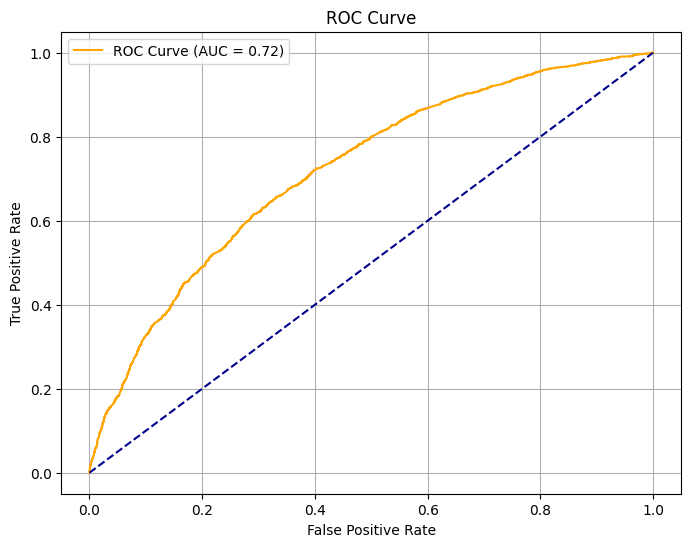

In [ ]:
# Convert classification report to a dictionary first, then create a DataFrame
class_report_dict = classification_report(y_true, y_pred_class, output_dict=True)

# Convert the dictionary to a pandas DataFrame
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Display the DataFrame
print(class_report_df)

# Visualization : ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## Key Insight
The model is much better at detecting Parkinson's diseas(class1)but it struggles to identify true negatives (class 0), leading to poor performance for "Not Parkinson" cases.
Precision is balanced between the classes, but the low recall for class 0 suggests that the model is highly biased toward predicting Parkinson's disease.
An AUC of 0.72 indicates decent discrimination between the two classes.

## Agglomerative Hierarchical Clustering:


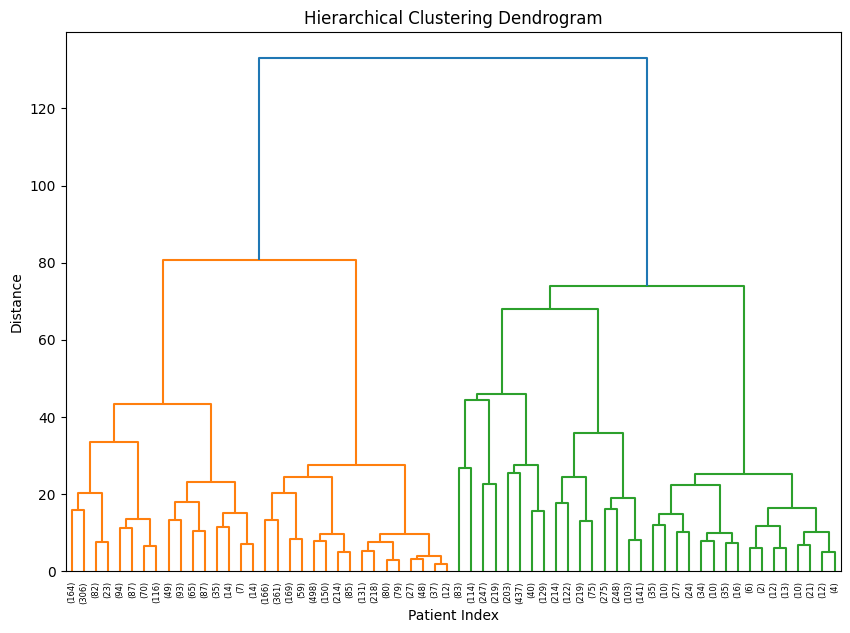

,Participant ID,Record ID,Visit ID,Sex of participant at birth,Decoded Value for COHORT,Rigidity Mean,Tremor Mean,Motor Function Mean,Posture and Gait Mean,Non-Motor Symptoms Mean,Rigidity Sum,Tremor Sum,Motor Function Sum,Posture and Gait Sum,Non-Motor Symptoms Sum,Visit Number,Parkinson,Cluster
0,3000.0,272451501,BL,0,Healthy Control,0.0,0.000000,0.3,0.2,0.133333,0.0,0.0,3.0,1.0,2.0,1,0,2
1,3000.0,338702301,V04,0,Healthy Control,0.0,0.000000,0.0,0.2,0.266667,0.0,0.0,0.0,1.0,4.0,4,0,2
2,3000.0,385009201,V06,0,Healthy Control,0.0,0.000000,0.3,0.2,0.066667,0.0,0.0,3.0,1.0,1.0,6,0,2
3,3000.0,512466901,V10,0,Healthy Control,0.0,0.444444,1.4,0.2,0.333333,0.0,4.0,14.0,1.0,5.0,10,0,0
4,3001.0,278741601,BL,1,Parkinson's Disease,0.0,0.000000,0.2,0.2,0.533333,0.0,0.0,2.0,1.0,8.0,1,1,2


In [ ]:
X = df[['Rigidity Sum', 'Tremor Sum', 'Motor Function Sum', 'Posture and Gait Sum', 'Non-Motor Symptoms Sum']].dropna()

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute the linkage matrix for hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Step 4: Plot the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patient Index')
plt.ylabel('Distance')
plt.show()

# Step 5: Perform Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = cluster.fit_predict(X_scaled)

# Step 6: Add the cluster labels to the dataset
df['Cluster'] = labels

# Display first few rows with clusters
df.head()

In [ ]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(linked, t=60, criterion='distance')

#  Filter to include only numeric columns
numeric_cols = X

# Add the cluster labels to the numeric data
numeric_cols['Cluster'] = df['Cluster']

# Calculate the mean for each cluster, ignoring non-numeric columns
cluster_means = numeric_cols.groupby('Cluster').mean()
cluster_means


,Rigidity Sum,Tremor Sum,Motor Function Sum,Posture and Gait Sum,Non-Motor Symptoms Sum
Cluster,,,,,
0,5.031718,3.577902,10.707912,2.308470,5.428372
1,1.758806,1.923430,5.025268,1.174579,15.577335
2,0.436590,0.675664,1.328192,0.581405,4.594259
3,7.494465,2.789668,19.003690,9.225092,5.092251


Cluster 1:
Rigidity Sum: 7.49
Tremor Sum: 2.79
Motor Function Sum: 19.00
Posture and Gait Sum: 9.23
Non-Motor Symptoms Sum: 5.09

Cluster 2:
Rigidity Sum: 3.60
Tremor Sum: 1.39
Motor Function Sum: 9.33
Posture and Gait Sum: 2.04
Non-Motor Symptoms Sum: 4.44

Cluster 3:
Rigidity Sum: 6.39
Tremor Sum: 5.65
Motor Function Sum: 12.02
Posture and Gait Sum: 2.56
Non-Motor Symptoms Sum: 6.36

Cluster 4:
Rigidity Sum: 0.44
Tremor Sum: 0.68
Motor Function Sum: 1.33
Posture and Gait Sum: 0.58
Non-Motor Symptoms Sum: 4.59

Cluster 5:
Rigidity Sum: 1.76
Tremor Sum: 1.92
Motor Function Sum: 5.03
Posture and Gait Sum: 1.17
Non-Motor Symptoms Sum: 15.58

## Summary of Clusters:
Cluster 1: Moderate-to-severe motor dysfunction with notable posture and gait issues.

Cluster 2: Mild motor symptoms, with minimal posture and gait impairment.

Cluster 3: Severe tremor, moderate motor dysfunction, and higher non-motor symptoms.

Cluster 4: Very mild motor symptoms but moderate non-motor symptoms.

Cluster 5: Mild motor symptoms but very high non-motor complications.

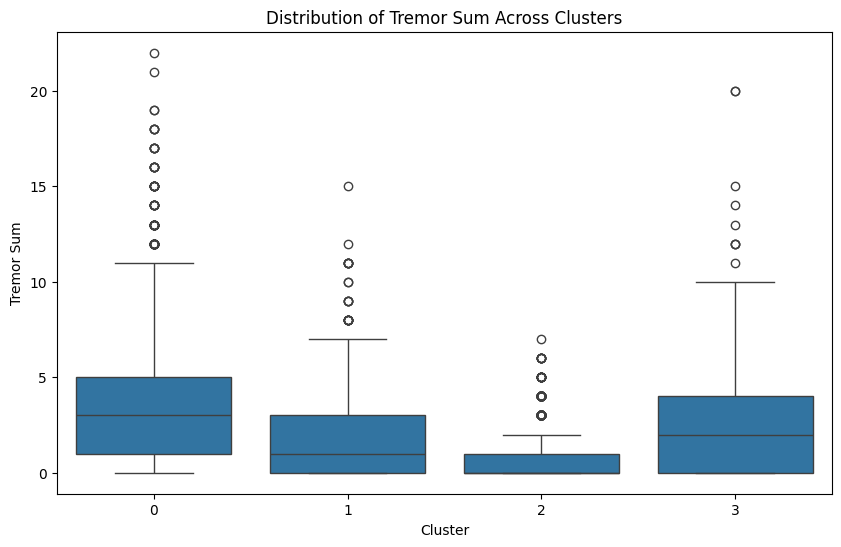

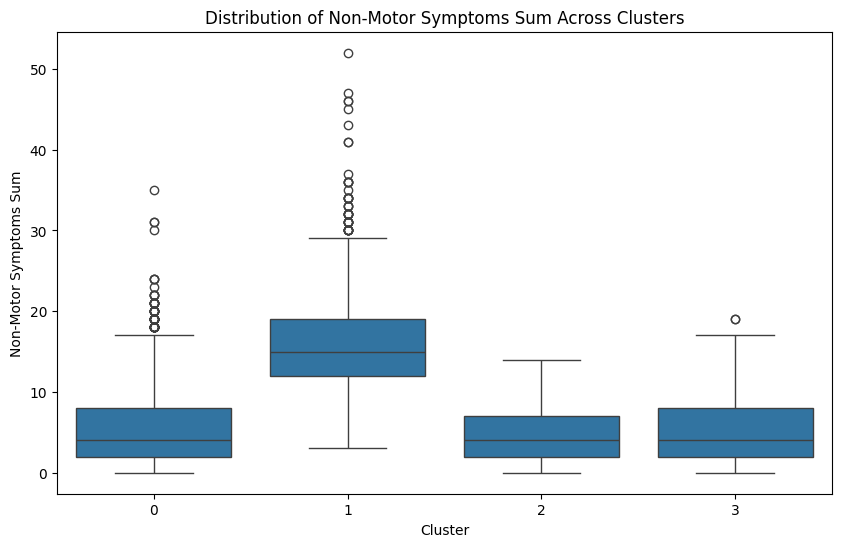

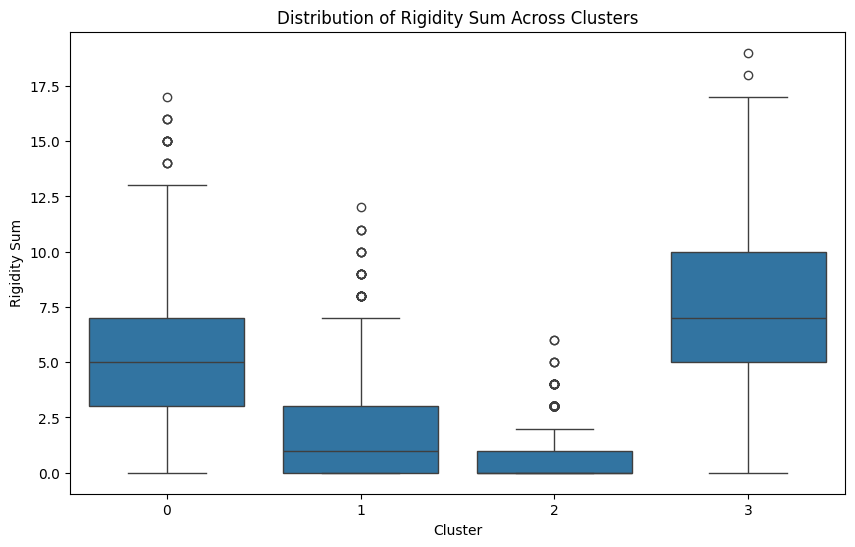

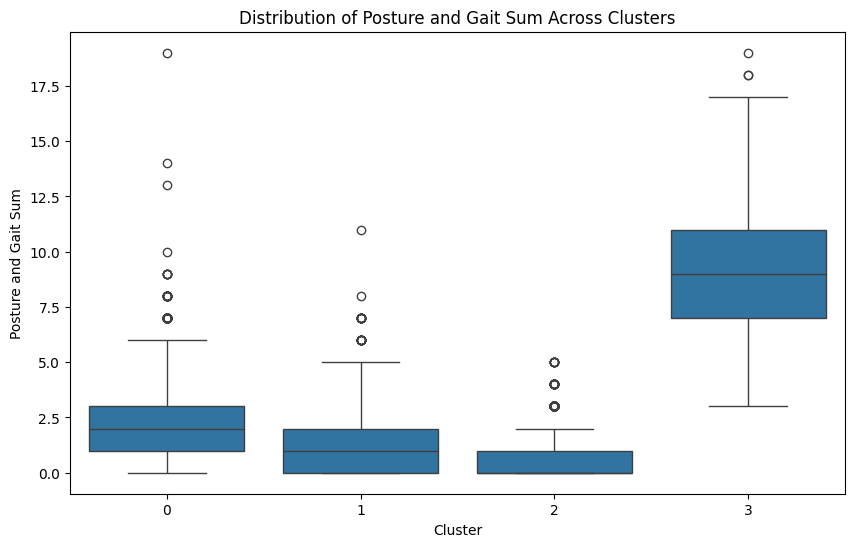

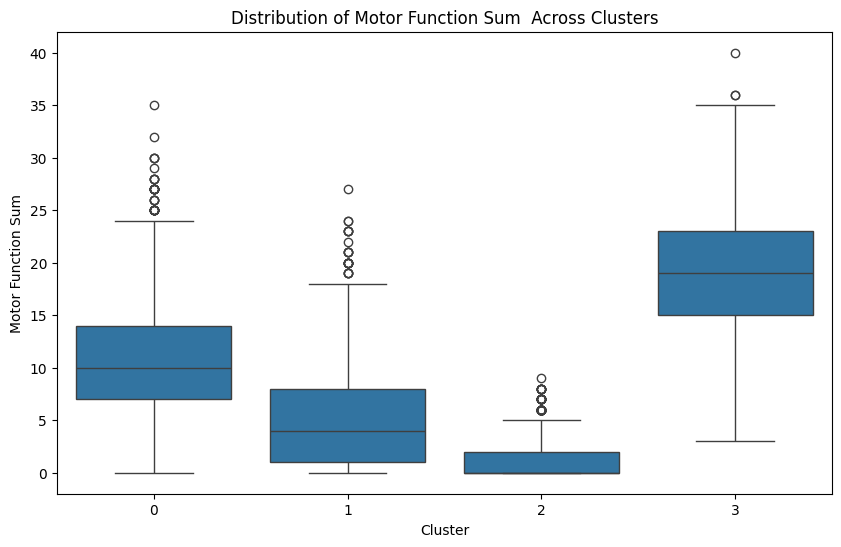

In [ ]:
# Visualize the distribution of Tremor Sum across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Tremor Sum', data=df)
plt.title('Distribution of Tremor Sum Across Clusters')
plt.show()

# Visualize the distribution of Non-Motor Symptoms Sum across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Non-Motor Symptoms Sum', data=df)
plt.title('Distribution of Non-Motor Symptoms Sum Across Clusters')
plt.show()

# Visualize the distribution of Non-Motor Symptoms Sum across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Rigidity Sum', data=df)
plt.title('Distribution of Rigidity Sum Across Clusters')
plt.show()

# Visualize the distribution of Non-Motor Symptoms Sum across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Posture and Gait Sum', data=df)
plt.title('Distribution of Posture and Gait Sum Across Clusters')
plt.show()

# Visualize the distribution of Non-Motor Symptoms Sum across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Motor Function Sum', data=df)
plt.title('Distribution of Motor Function Sum  Across Clusters')
plt.show()